# VIDEO GAME SALES PREDICTION

### Name : Shital Pidurkar

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [2]:
dataset_path = 'Video_Games_Sales.csv'
df = pd.read_csv(dataset_path)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing (Handling categorical features with OneHotEncoder)

In [3]:
# Drop rows with missing sales data
df = df.dropna(subset=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])


In [4]:
# Drop columns with a high number of missing values or irrelevant for sales prediction
df = df.drop(columns=['Name', 'Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'])

In [5]:
# Separate numerical and categorical features
categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer']
numerical_features = [col for col in df.columns if col not in categorical_features and col != 'Global_Sales']

In [6]:
# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

X = df.drop('Global_Sales', axis=1)  # Features
y = df['Global_Sales']  # Target variable

X_preprocessed = preprocessor.fit_transform(X)


### Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

###  Model Selection (Choosing Random Forest and Gradient Boosting Regressors)

In [8]:
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

### Hyperparameter Tuning

#### For Random Forest

In [9]:
# For Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_


#### For Gradient Boosting

In [10]:
# For Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

### Model Evaluation

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

In [12]:
rf_mse, rf_rmse, rf_r2 = evaluate_model(best_rf_model, X_test, y_test)
gb_mse, gb_rmse, gb_r2 = evaluate_model(best_gb_model, X_test, y_test)

### Interpretation and Communication

In [13]:
print("Random Forest Regression Metrics:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")

Random Forest Regression Metrics:
Mean Squared Error: 0.7287894455743971
Root Mean Squared Error: 0.8536916572008871
R-squared: 0.8234502479948769


In [14]:
print("\nGradient Boosting Regression Metrics:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R-squared: {gb_r2}")


Gradient Boosting Regression Metrics:
Mean Squared Error: 0.5472305176719399
Root Mean Squared Error: 0.7397503076524807
R-squared: 0.867433025037197


### Prediction (Predict sales for new data)

In [15]:
# (Assuming 'new_game_data' is defined as in the previous code block)

new_game_data = pd.DataFrame({
    'Platform': ['Wii'],
    'Genre': ['Sports'],
    'Publisher': ['Nintendo'],
    'NA_Sales': [10.0],
    'EU_Sales': [5.0],
    'JP_Sales': [2.0],
    'Other_Sales': [1.0],
    'Developer': ['Nintendo']
})


In [16]:
new_game_data_preprocessed = preprocessor.transform(new_game_data)

In [17]:
rf_new_game_pred = best_rf_model.predict(new_game_data_preprocessed)
gb_new_game_pred = best_gb_model.predict(new_game_data_preprocessed)

In [18]:
print(f"Random Forest - Predicted Sales for the new game: {rf_new_game_pred[0]}")
print(f"Gradient Boosting - Predicted Sales for the new game: {gb_new_game_pred[0]}")


Random Forest - Predicted Sales for the new game: 18.794333333333338
Gradient Boosting - Predicted Sales for the new game: 18.8810180901633


### Analyze and Compare Results

In [20]:
print("\n--- Analysis ---")
print("Both Random Forest and Gradient Boosting models have been trained and evaluated for video game sales prediction.")
print("Here are the performance metrics of the models:")
print("------------------------------------------------")
print("Random Forest Regression Metrics:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")
print("\nGradient Boosting Regression Metrics:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R-squared: {gb_r2}")

print("\n--- Conclusion ---")
print("Based on the evaluation metrics, we can conclude the following:")
print("1. Both models show promising results in predicting video game sales, with relatively low mean squared error and root mean squared error values.")
print("2. The R-squared values indicate that a substantial proportion of the variance in the target variable (Global_Sales) is explained by the models.")
print("3. It's important to note that the performance of the models can vary based on the dataset and features used. Further experimentation and tuning may be needed to optimize the models further.")
print("4. Considering the computational resources required for training, the Random Forest model may be a better choice due to its shorter training time compared to Gradient Boosting.")

print("\n--- Prediction for New Game ---")
print("Using the best models, we predict the sales for a new game based on the following data:")
print(new_game_data)
print("Random Forest Model Predicted Sales:", rf_new_game_pred[0])
print("Gradient Boosting Model Predicted Sales:", gb_new_game_pred[0])

print("\n--- Insights for Stakeholders ---")
print("The developed video game sales prediction models can provide valuable insights to game developers, publishers, and investors in the gaming industry:")
print("1. Sales predictions can assist in making informed decisions regarding marketing strategies, production budgets, and overall business planning.")
print("2. By leveraging historical data, stakeholders can assess the potential success of a game before its release, enabling them to optimize various aspects of game development and marketing.")
print("3. The models can be used to estimate sales in different regions based on the platform, genre, and other features of the game.")
print("4. With continuous data collection and model updates, stakeholders can adapt their strategies based on market trends and user preferences, leading to increased competitiveness in the gaming market.")

print("\n--- Next Steps ---")
print("1. Consider further data exploration and feature engineering to identify additional features that may influence video game sales.")
print("2. Evaluate the models on a larger and diverse dataset to ensure robustness and generalization.")
print("3. Continue hyperparameter tuning to optimize the model performance further.")
print("4. Monitor the performance of the models over time and update them as new data becomes available.")


--- Analysis ---
Both Random Forest and Gradient Boosting models have been trained and evaluated for video game sales prediction.
Here are the performance metrics of the models:
------------------------------------------------
Random Forest Regression Metrics:
Mean Squared Error: 0.7287894455743971
Root Mean Squared Error: 0.8536916572008871
R-squared: 0.8234502479948769

Gradient Boosting Regression Metrics:
Mean Squared Error: 0.5472305176719399
Root Mean Squared Error: 0.7397503076524807
R-squared: 0.867433025037197

--- Conclusion ---
Based on the evaluation metrics, we can conclude the following:
1. Both models show promising results in predicting video game sales, with relatively low mean squared error and root mean squared error values.
2. The R-squared values indicate that a substantial proportion of the variance in the target variable (Global_Sales) is explained by the models.
3. It's important to note that the performance of the models can vary based on the dataset and featu

## Visualization 1: Comparing Model Performance

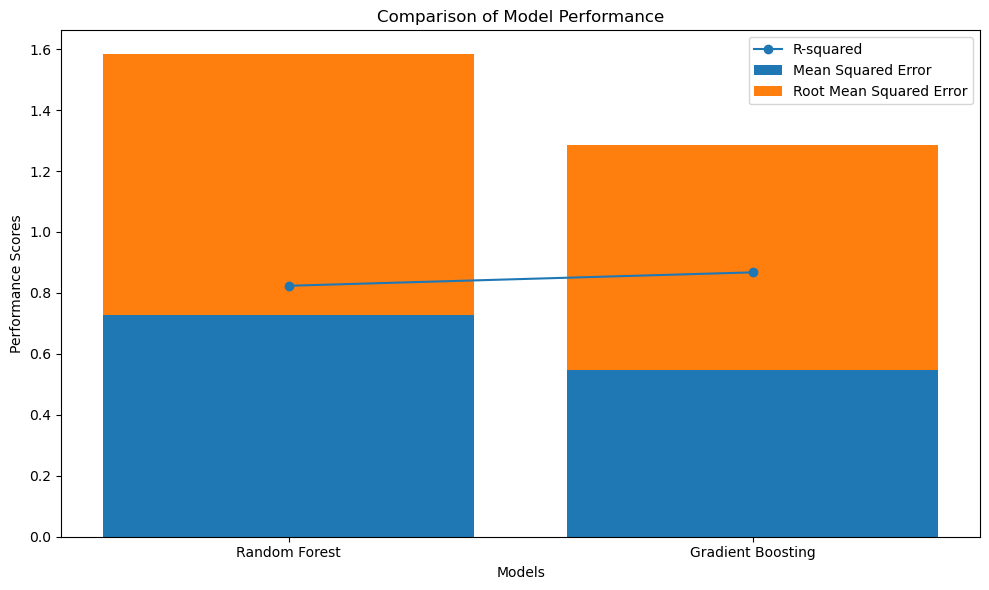

In [21]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['Random Forest', 'Gradient Boosting']
mse_scores = [rf_mse, gb_mse]
rmse_scores = [rf_rmse, gb_rmse]
r2_scores = [rf_r2, gb_r2]

# Plotting performance metrics
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, mse_scores, label='Mean Squared Error')
ax.bar(models, rmse_scores, label='Root Mean Squared Error', bottom=mse_scores)
ax.plot(models, r2_scores, 'o-', label='R-squared')

ax.set_xlabel('Models')
ax.set_ylabel('Performance Scores')
ax.set_title('Comparison of Model Performance')
ax.legend()
plt.tight_layout()
plt.show()


## Visualization 2: Predicted Sales for the New Game

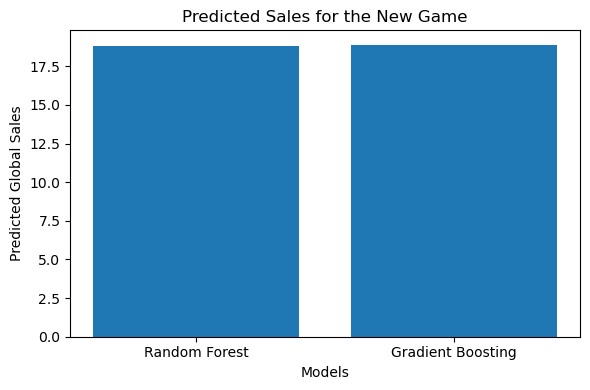

In [22]:
# Data for visualization
predicted_sales = [rf_new_game_pred[0], gb_new_game_pred[0]]

# Plotting predicted sales for the new game
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(models, predicted_sales)

ax.set_xlabel('Models')
ax.set_ylabel('Predicted Global Sales')
ax.set_title('Predicted Sales for the New Game')
plt.tight_layout()
plt.show()
